In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
#Educ = pd.read_csv('COVID_Educ.csv', index_col = 0)
#Bach = pd.read_csv('COVID_Bach.csv', index_col = 0)
#Doc = pd.read_csv('COVID_Doc.csv', index_col = 0)
#EdAttain = pd.read_csv('COVID_EducAttain.csv', index_col = 0)
#ELL = pd.read_csv('COVID_ELL.csv', index_col = 0)
#LitDF = [Educ, Bach, Doc, EdAttain, ELL]
#LitFinal = reduce(lambda left, right: pd.merge(left, right, how = 'outer', on = ['State', 'cases', 'deaths']), LitDF)
#LitFinal = LitFinal.drop(['fips'], axis = 1)
#LitFinal.head()
#LitFinal.to_csv('COVID_Education_Merged.csv')

In [3]:
LitDF = pd.read_csv('COVID_Education_Merged.csv', index_col = 0)
LitDF.head()

,State,cases,deaths,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017
0,Alabama,387786,14345,231,145,267,141,624760,2219105,28.153693,493174,248175,741349,470043.0,1020172.0,987148.0,822595.0,25212
1,Alaska,18316,367,236,154,280,154,108145,371180,29.135460,506,293,799,34760.0,133851.0,169471.0,139645.0,15623
2,Arizona,426614,18857,238,149,283,148,1014830,3396895,29.875224,560204,321105,881309,613002.0,1112551.0,1570308.0,1338071.0,88629
3,Arkansas,161569,3301,235,150,275,148,347335,1379145,25.184807,20363,15171,35534,276029.0,681223.0,590434.0,451621.0,39836
4,California,2664110,102387,232,140,275,143,7115070,20038675,35.506689,49711105,2676741,52387846,4475565.0,5391120.0,7633463.0,8718737.0,1197296


In [4]:
LitDF.shape

(51, 18)

In [5]:
LitDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    51 non-null     object 
 1   cases                                    51 non-null     int64  
 2   deaths                                   51 non-null     int64  
 3   4th 2015 Math                            51 non-null     int64  
 4   4th 2015 Science                         51 non-null     int64  
 5   8th 2015 Math                            51 non-null     int64  
 6   8th 2015 Science                         51 non-null     int64  
 7   Labor Force w/ Bachelor 2018             51 non-null     int64  
 8   Labor Force Participants 2018            51 non-null     int64  
 9   Percent of Labor Force w/ Bachelor 2018  51 non-null     float64
 10  Doctorate From Doc Inst 2018             51 non-null

In [6]:
LitDF.isnull().sum()

State                                      0
cases                                      0
deaths                                     0
4th 2015 Math                              0
4th 2015 Science                           0
8th 2015 Math                              0
8th 2015 Science                           0
Labor Force w/ Bachelor 2018               0
Labor Force Participants 2018              0
Percent of Labor Force w/ Bachelor 2018    0
Doctorate From Doc Inst 2018               0
Doctorate From Bach Inst 2018              0
Total Doctorate Degrees 2018               0
Less Than HS Diploma 14-18                 0
HS Diploma 14-18                           0
Some College or Associate Degree 14-18     0
Bachelor Degree or Higher 14-18            0
ELL Students Enrolled 2017                 0
dtype: int64

In [7]:
LitDF.count()

State                                      51
cases                                      51
deaths                                     51
4th 2015 Math                              51
4th 2015 Science                           51
8th 2015 Math                              51
8th 2015 Science                           51
Labor Force w/ Bachelor 2018               51
Labor Force Participants 2018              51
Percent of Labor Force w/ Bachelor 2018    51
Doctorate From Doc Inst 2018               51
Doctorate From Bach Inst 2018              51
Total Doctorate Degrees 2018               51
Less Than HS Diploma 14-18                 51
HS Diploma 14-18                           51
Some College or Associate Degree 14-18     51
Bachelor Degree or Higher 14-18            51
ELL Students Enrolled 2017                 51
dtype: int64

In [8]:
LitDF.describe()

,cases,deaths,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017
count,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,1.056306e+06,5.861198e+04,240.274510,154.411765,281.725490,154.529412,1.112628e+06,3.233299e+06,33.496384,2.750370e+06,4.391372e+05,3.189507e+06,5.283933e+05,1.162065e+06,1.242464e+06,1.350334e+06,9.711192e+04
std,2.249183e+06,1.579360e+05,4.956121,5.783343,7.122018,6.041036,1.307552e+06,3.690659e+06,7.016406,9.025357e+06,5.524365e+05,9.456177e+06,7.729664e+05,1.185706e+06,1.386208e+06,1.583990e+06,2.073377e+05
min,1.831600e+04,2.810000e+02,231.000000,140.000000,263.000000,140.000000,7.860500e+04,2.991200e+05,24.087334,4.190000e+02,2.930000e+02,7.990000e+02,2.764400e+04,8.357200e+04,7.725500e+04,1.046770e+05,1.770000e+03
25%,1.696980e+05,4.021000e+03,237.000000,152.000000,278.000000,150.500000,2.633925e+05,8.138475e+05,29.324344,2.153700e+04,1.464700e+04,3.368050e+04,1.067150e+05,3.172810e+05,3.620070e+05,3.342105e+05,1.519800e+04
50%,3.877860e+05,1.425100e+04,240.000000,154.000000,283.000000,155.000000,6.247600e+05,2.135975e+06,31.808287,4.411270e+05,2.811260e+05,7.012500e+05,3.163450e+05,8.064070e+05,8.730370e+05,8.225950e+05,4.622000e+04
75%,1.047118e+06,5.046050e+04,243.500000,158.000000,286.000000,159.500000,1.509512e+06,3.831268e+06,36.309370,1.139802e+06,6.112510e+05,1.765433e+06,6.015450e+05,1.424464e+06,1.485197e+06,1.850156e+06,8.513200e+04
max,1.504181e+07,1.081194e+06,251.000000,165.000000,297.000000,166.000000,7.115070e+06,2.003868e+07,65.744864,4.971110e+07,2.676741e+06,5.238785e+07,4.475565e+06,5.391120e+06,7.633463e+06,8.718737e+06,1.197296e+06


In [9]:
corr = LitDF.corr()
corr

,cases,deaths,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017
cases,1.000000,0.990033,-0.024630,-0.125200,0.057414,-0.121630,0.567957,0.486334,0.297817,0.544136,0.631995,0.556267,0.429839,0.516079,0.424801,0.552539,0.268764
deaths,0.990033,1.000000,-0.039842,-0.113106,0.045291,-0.105126,0.476397,0.393360,0.276788,0.488008,0.560543,0.498522,0.340015,0.428246,0.333807,0.460849,0.178374
4th 2015 Math,-0.024630,-0.039842,1.000000,0.783754,0.864560,0.733189,-0.005124,-0.024376,0.127754,-0.157697,0.064699,-0.146733,-0.123821,-0.006926,-0.048070,-0.017034,-0.101403
4th 2015 Science,-0.125200,-0.113106,0.783754,1.000000,0.646174,0.904980,-0.219274,-0.231893,0.199784,-0.310751,-0.155567,-0.305681,-0.303916,-0.196820,-0.246639,-0.227177,-0.285405
8th 2015 Math,0.057414,0.045291,0.864560,0.646174,1.000000,0.721643,0.010118,-0.039077,0.172806,-0.085366,0.072352,-0.077250,-0.134261,-0.076968,-0.077137,-0.008563,-0.070592
8th 2015 Science,-0.121630,-0.105126,0.733189,0.904980,0.721643,1.000000,-0.211074,-0.230141,0.202853,-0.242779,-0.137878,-0.239773,-0.298405,-0.232277,-0.252274,-0.224239,-0.233053
Labor Force w/ Bachelor 2018,0.567957,0.476397,-0.005124,-0.219274,0.010118,-0.211074,1.000000,0.988968,0.209910,0.863215,0.924924,0.877922,0.959875,0.947824,0.970608,0.998761,0.884792
Labor Force Participants 2018,0.486334,0.393360,-0.024376,-0.231893,-0.039077,-0.230141,0.988968,1.000000,0.116554,0.852557,0.893173,0.865895,0.978909,0.969499,0.992953,0.991102,0.908127
Percent of Labor Force w/ Bachelor 2018,0.297817,0.276788,0.127754,0.199784,0.172806,0.202853,0.209910,0.116554,1.000000,0.109460,0.269355,0.120209,0.053165,0.059317,0.061346,0.192764,0.061734
Doctorate From Doc Inst 2018,0.544136,0.488008,-0.157697,-0.310751,-0.085366,-0.242779,0.863215,0.852557,0.109460,1.000000,0.767862,0.999299,0.907477,0.751089,0.825058,0.857097,0.904531


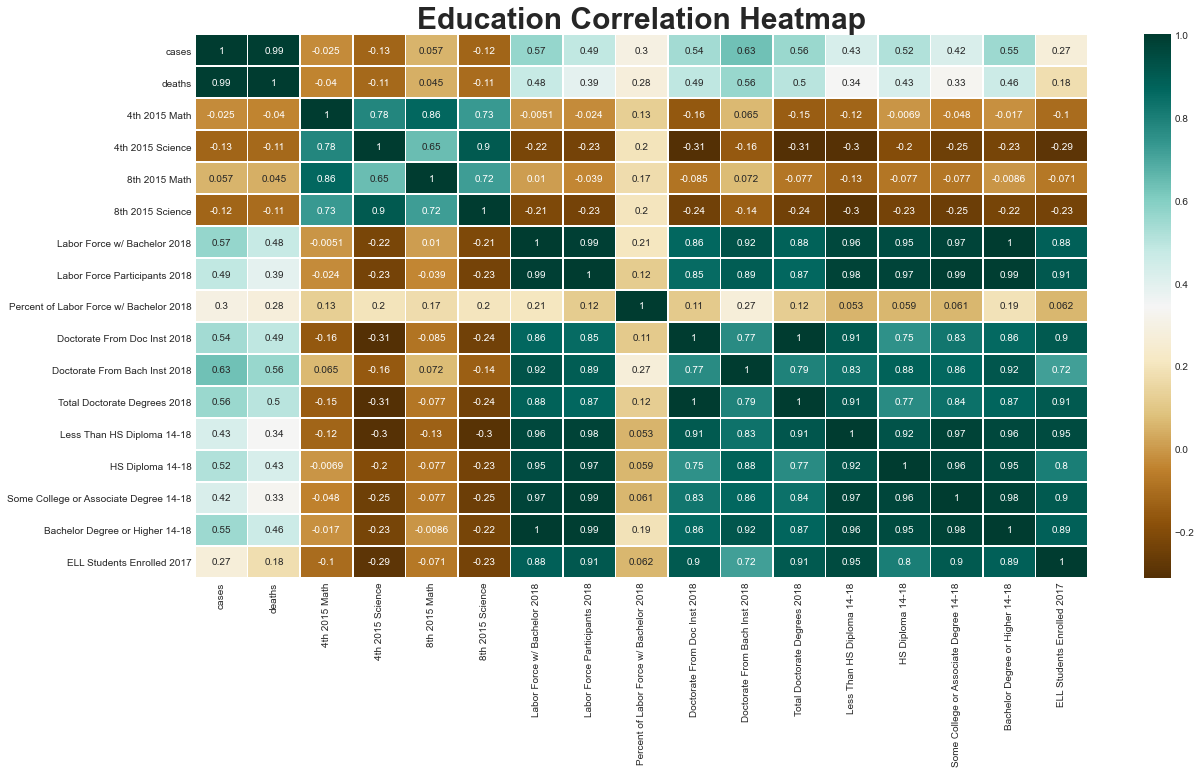

In [10]:
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Education Correlation Heatmap', fontweight = 'bold', fontsize = 30);

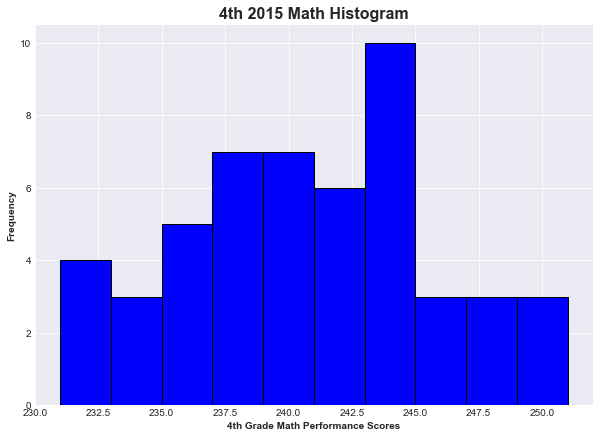

In [11]:
plt.style.use('seaborn-darkgrid')

LitDF['4th 2015 Math'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('4th 2015 Math Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

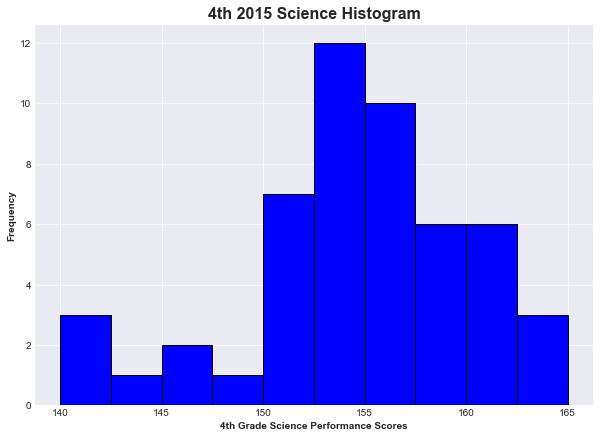

In [12]:
plt.style.use('seaborn-darkgrid')

LitDF['4th 2015 Science'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('4th 2015 Science Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

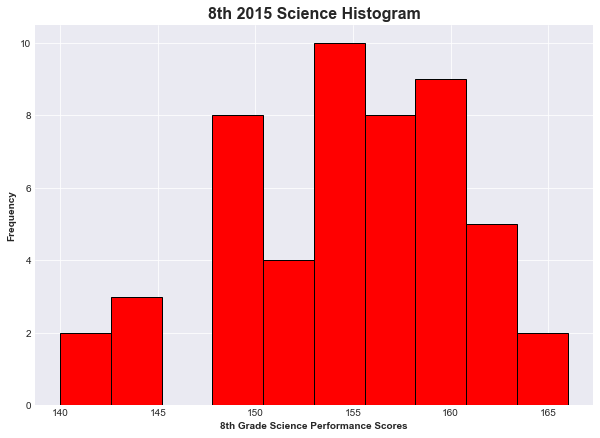

In [13]:
plt.style.use('seaborn-darkgrid')

LitDF['8th 2015 Science'].plot(kind = 'hist', color = 'red', edgecolor = 'black', figsize = (10,7))
plt.title('8th 2015 Science Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

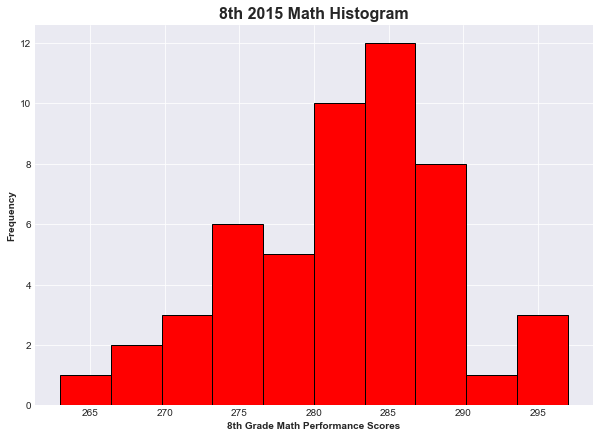

In [14]:
plt.style.use('seaborn-darkgrid')

LitDF['8th 2015 Math'].plot(kind = 'hist', color = 'red', edgecolor = 'black', figsize = (10,7))
plt.title('8th 2015 Math Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

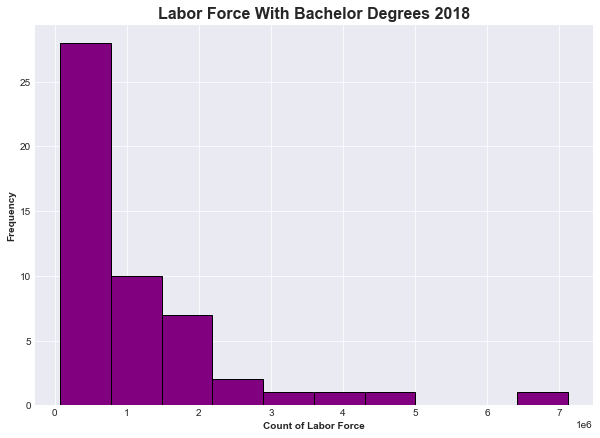

In [15]:
plt.style.use('seaborn-darkgrid')

LitDF['Labor Force w/ Bachelor 2018'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('Labor Force With Bachelor Degrees 2018', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

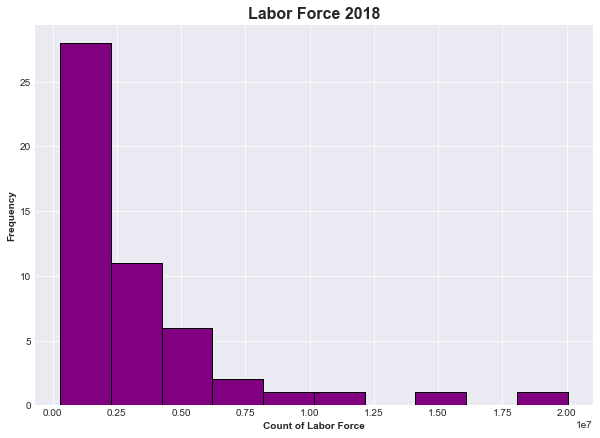

In [16]:
plt.style.use('seaborn-darkgrid')

LitDF['Labor Force Participants 2018'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('Labor Force 2018', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

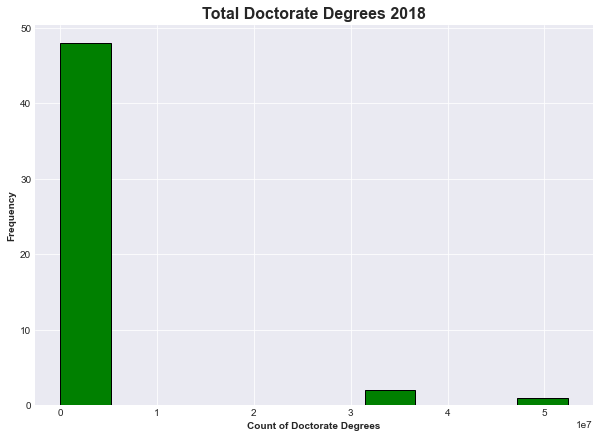

In [17]:
plt.style.use('seaborn-darkgrid')

LitDF['Total Doctorate Degrees 2018'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Total Doctorate Degrees 2018', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Doctorate Degrees', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

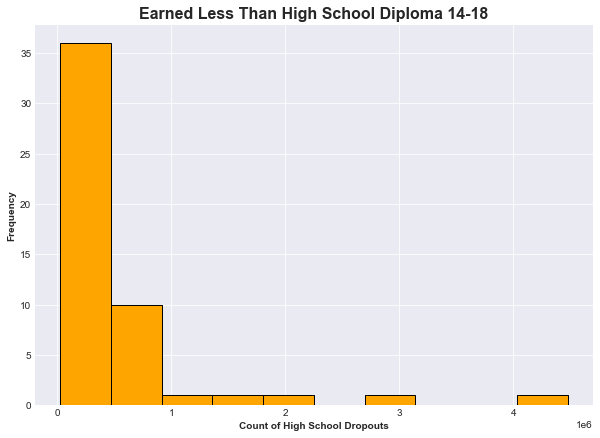

In [18]:
plt.style.use('seaborn-darkgrid')

LitDF['Less Than HS Diploma 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Less Than High School Diploma 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of High School Dropouts', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

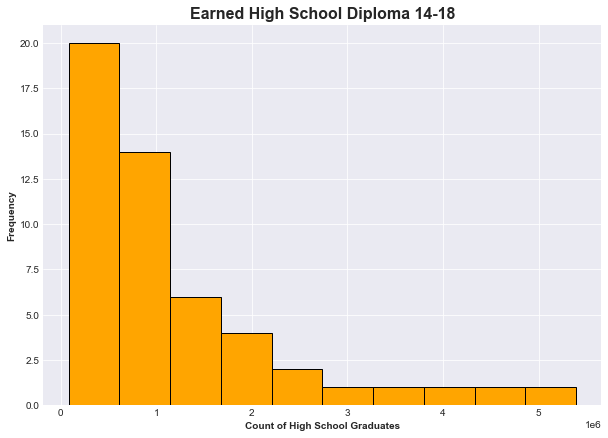

In [19]:
plt.style.use('seaborn-darkgrid')

LitDF['HS Diploma 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned High School Diploma 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of High School Graduates', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

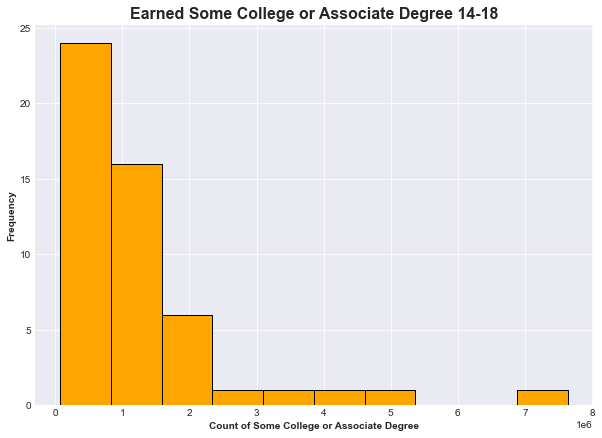

In [20]:
plt.style.use('seaborn-darkgrid')

LitDF['Some College or Associate Degree 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Some College or Associate Degree 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Some College or Associate Degree', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

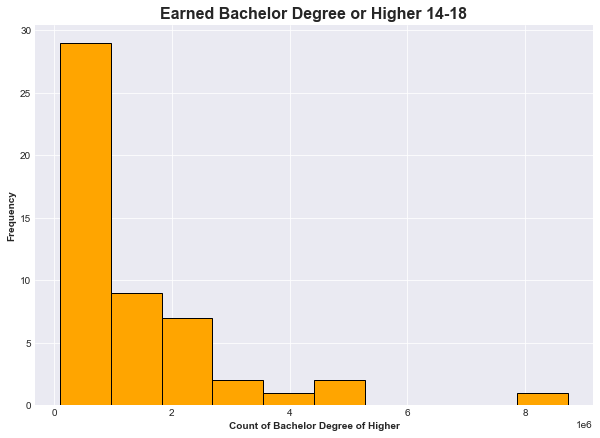

In [21]:
plt.style.use('seaborn-darkgrid')

LitDF['Bachelor Degree or Higher 14-18'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Bachelor Degree or Higher 14-18', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Bachelor Degree of Higher', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

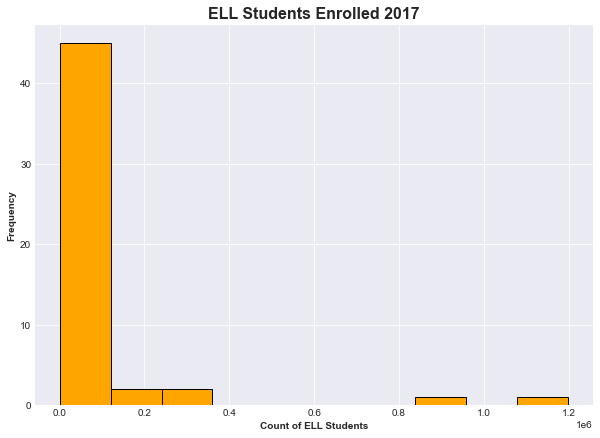

In [22]:
plt.style.use('seaborn-darkgrid')

LitDF['ELL Students Enrolled 2017'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('ELL Students Enrolled 2017', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of ELL Students', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

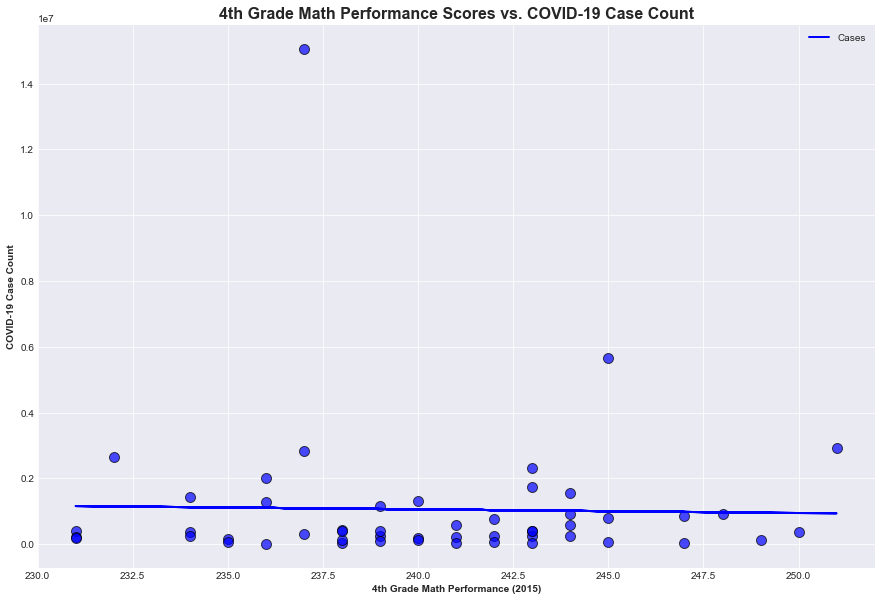

In [23]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (15,10))

plt.scatter(x = LitDF['4th 2015 Math'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, color = 'blue', edgecolor = 'k', s = 100)
plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

Fourth_Math_Fit = np.polyfit(LitDF['4th 2015 Math'], LitDF['cases'], 1)
plt.plot(LitDF['4th 2015 Math'], Fourth_Math_Fit[0]*LitDF['4th 2015 Math'] + Fourth_Math_Fit[1], color = 'blue', linewidth = 2)

plt.legend(['Cases'])

plt.show();

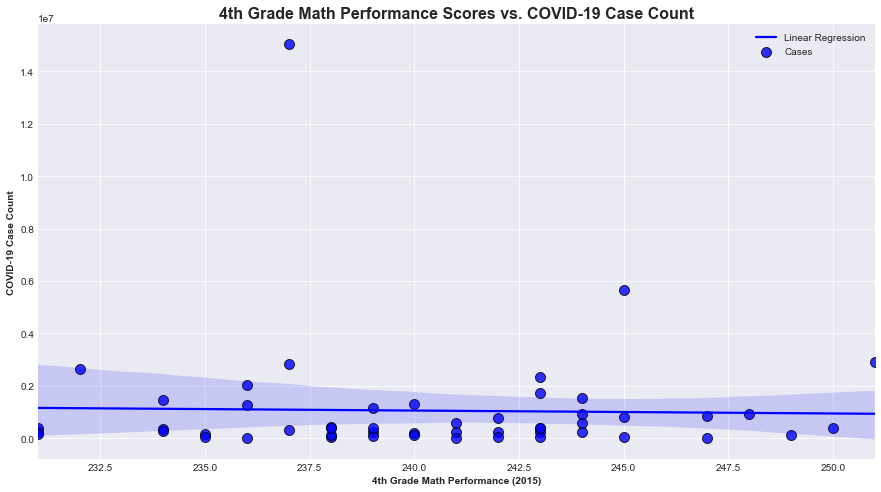

In [24]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '4th 2015 Math', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [25]:
model1 = sm.OLS(LitDF['cases'], LitDF['4th 2015 Math']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.183
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              11.21
Date:                Fri, 29 May 2020   Prob (F-statistic):                     0.00155
Time:                        23:44:48   Log-Likelihood:                         -817.81
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
4th 2015 Math  4389.7549   1310.887      3.349      0.002    1756.761    7022.749
==============================================================================
Omnibus:                       91.498   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1878.407
Skew:                           5.035   Prob(JB):                         0.00
Kurtosis:                      30.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

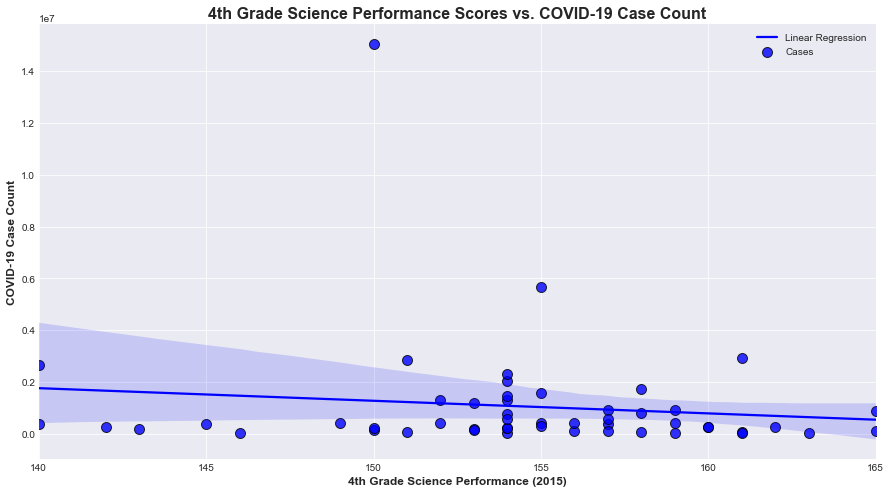

In [26]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '4th 2015 Science', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('4th Grade Science Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Science Performance (2015)', fontsize = 12, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 12, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [27]:
model2 = sm.OLS(LitDF['cases'], LitDF['4th 2015 Science']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              10.96
Date:                Fri, 29 May 2020   Prob (F-statistic):                     0.00173
Time:                        23:44:49   Log-Likelihood:                         -817.91
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
4th 2015 Science  6764.5736   2043.036      3.311      0.002    2661.015    1.09e+04
==============================================================================
Omnibus:                       91.328   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.235
Skew:                           5.023   Prob(JB):                         0.00
Kurtosis:                      30.864   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

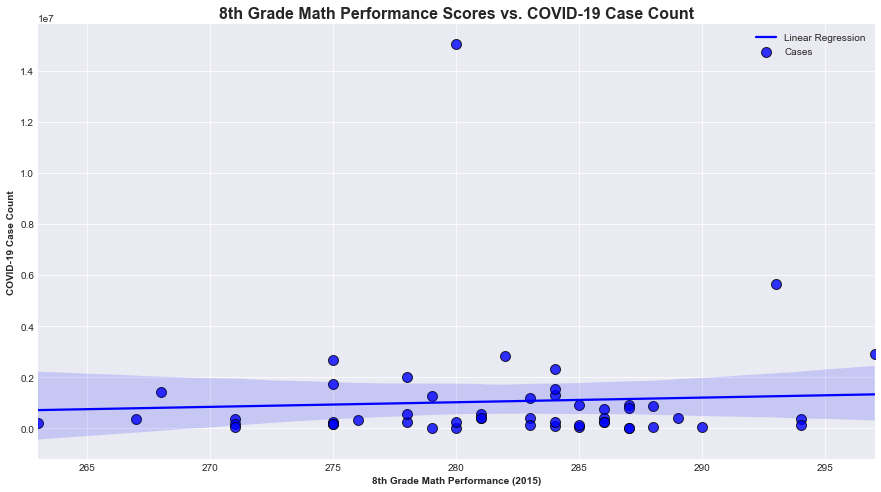

In [28]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '8th 2015 Math', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('8th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Math Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [29]:
model3 = sm.OLS(LitDF['cases'], LitDF['8th 2015 Math']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.185
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              11.32
Date:                Fri, 29 May 2020   Prob (F-statistic):                     0.00148
Time:                        23:44:49   Log-Likelihood:                         -817.76
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
8th 2015 Math  3758.4229   1116.893      3.365      0.001    1515.077    6001.769
==============================================================================
Omnibus:                       91.536   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1882.802
Skew:                           5.037   Prob(JB):                         0.00
Kurtosis:                      31.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

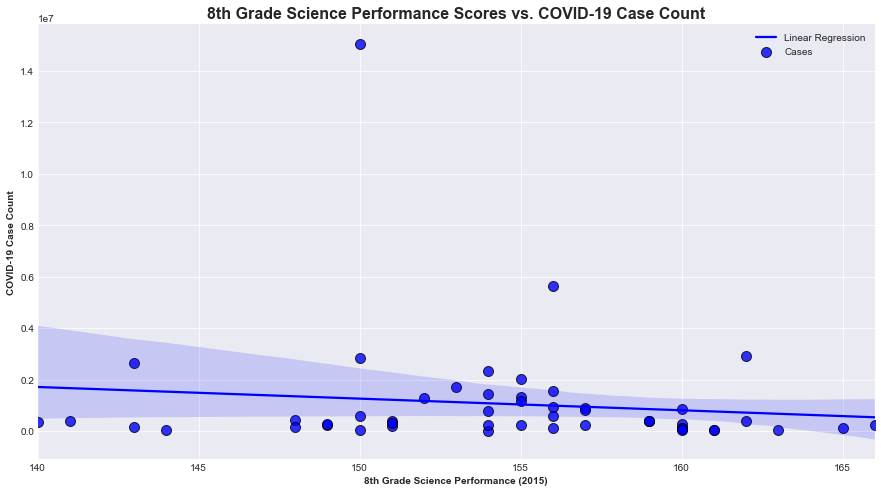

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '8th 2015 Science', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('8th Grade Science Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Science Performance (2015)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [31]:
model4 = sm.OLS(LitDF['cases'], LitDF['8th 2015 Science']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.180
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              10.96
Date:                Fri, 29 May 2020   Prob (F-statistic):                     0.00173
Time:                        23:44:49   Log-Likelihood:                         -817.91
No. Observations:                  51   AIC:                                      1638.
Df Residuals:                      50   BIC:                                      1640.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
8th 2015 Science  6757.6577   2041.445      3.310      0.002    2657.295    1.09e+04
==============================================================================
Omnibus:                       91.318   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1864.079
Skew:                           5.022   Prob(JB):                         0.00
Kurtosis:                      30.863   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

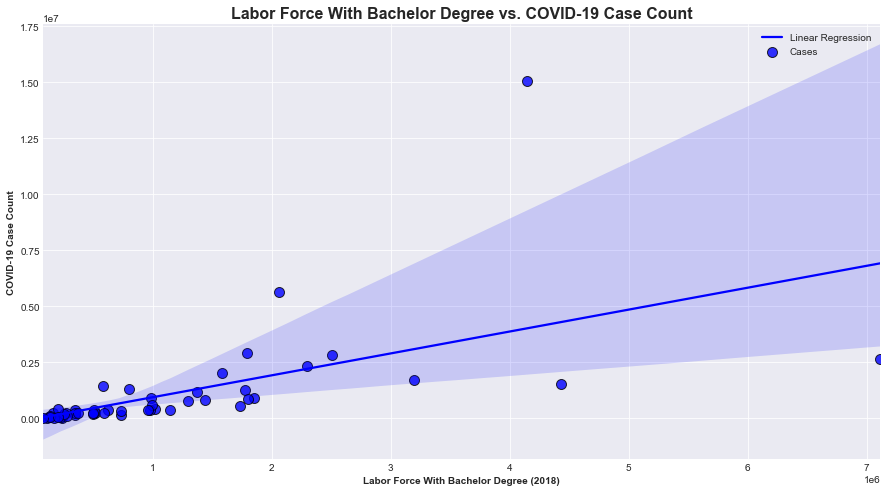

In [32]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Labor Force w/ Bachelor 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Labor Force With Bachelor Degree vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Labor Force With Bachelor Degree (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [33]:
model5 = sm.OLS(LitDF['cases'], LitDF['Labor Force w/ Bachelor 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.447
Model:                            OLS   Adj. R-squared (uncentered):              0.436
Method:                 Least Squares   F-statistic:                              40.40
Date:                Fri, 29 May 2020   Prob (F-statistic):                    6.10e-08
Time:                        23:44:50   Log-Likelihood:                         -807.86
No. Observations:                  51   AIC:                                      1618.
Df Residuals:                      50   BIC:                                      1620.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Labor Force w/ Bachelor 2018     0.9652      0.152      6.356      0.000       0.660       1.270
==============================================================================
Omnibus:                       80.693   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1363.094
Skew:                           4.155   Prob(JB):                    1.02e-296
Kurtosis:                      26.925   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

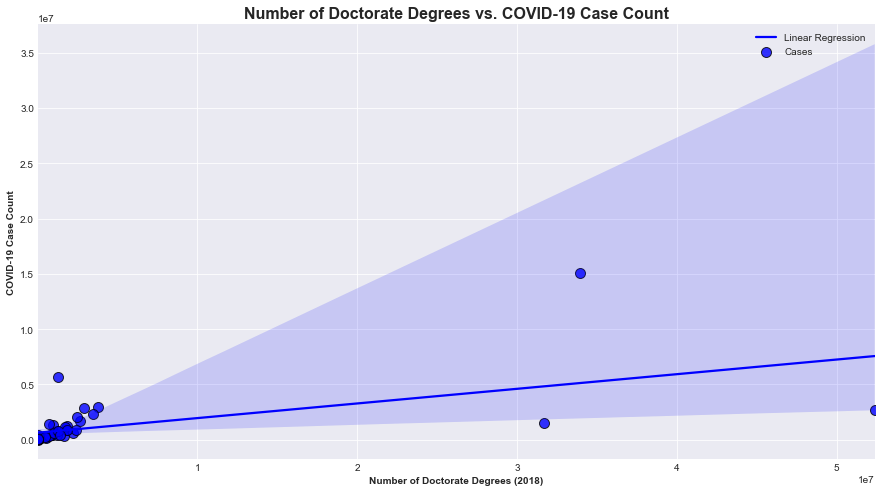

In [34]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Doctorate Degrees 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of Doctorate Degrees vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Doctorate Degrees (2018)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [35]:
model6 = sm.OLS(LitDF['cases'], LitDF['Total Doctorate Degrees 2018']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.377
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              30.25
Date:                Fri, 29 May 2020   Prob (F-statistic):                    1.30e-06
Time:                        23:44:50   Log-Likelihood:                         -810.90
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Total Doctorate Degrees 2018     0.1530      0.028      5.500      0.000       0.097       0.209
==============================================================================
Omnibus:                       46.532   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.620
Skew:                           2.019   Prob(JB):                     6.67e-80
Kurtosis:                      15.461   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

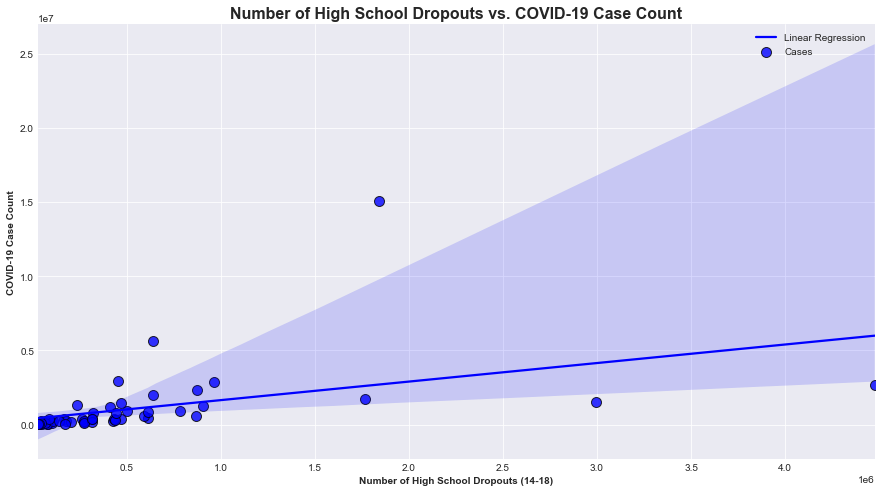

In [36]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Less Than HS Diploma 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of High School Dropouts vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of High School Dropouts (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [37]:
model7 = sm.OLS(LitDF['cases'], LitDF['Less Than HS Diploma 14-18']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.317
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              23.21
Date:                Fri, 29 May 2020   Prob (F-statistic):                    1.39e-05
Time:                        23:44:50   Log-Likelihood:                         -813.24
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      50   BIC:                                      1630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Less Than HS Diploma 14-18     1.4923      0.310      4.818      0.000       0.870       2.114
==============================================================================
Omnibus:                       79.393   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1236.126
Skew:                           4.099   Prob(JB):                    3.79e-269
Kurtosis:                      25.683   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

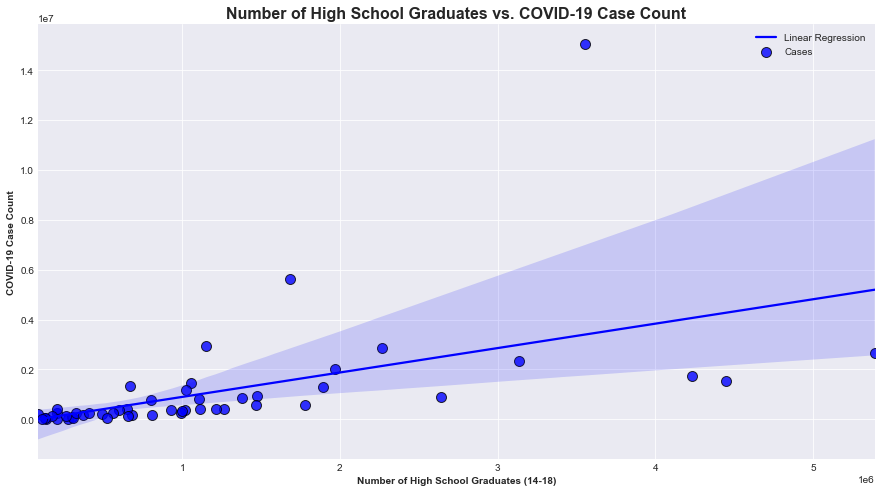

In [38]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'HS Diploma 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of High School Graduates vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of High School Graduates (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [39]:
model8 = sm.OLS(LitDF['cases'], LitDF['HS Diploma 14-18']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.401
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                              33.41
Date:                Fri, 29 May 2020   Prob (F-statistic):                    4.80e-07
Time:                        23:44:51   Log-Likelihood:                         -809.92
No. Observations:                  51   AIC:                                      1622.
Df Residuals:                      50   BIC:                                      1624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
HS Diploma 14-18     0.9443      0.163      5.780      0.000       0.616       1.272
==============================================================================
Omnibus:                       86.328   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1570.228
Skew:                           4.624   Prob(JB):                         0.00
Kurtosis:                      28.562   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

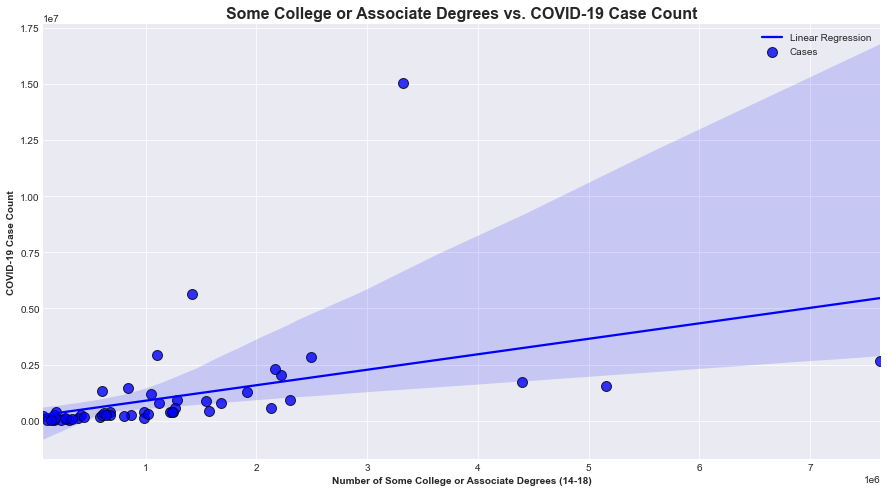

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Some College or Associate Degree 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Some College or Associate Degrees vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Some College or Associate Degrees (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
model9 = sm.OLS(LitDF['cases'], LitDF['Some College or Associate Degree 14-18']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.314
Method:                 Least Squares   F-statistic:                              24.33
Date:                Fri, 29 May 2020   Prob (F-statistic):                    9.37e-06
Time:                        23:44:51   Log-Likelihood:                         -812.85
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      50   BIC:                                      1630.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Some College or Associate Degree 14-18     0.7617      0.154      4.933      0.000       0.452       1.072
==============================================================================
Omnibus:                       86.460   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1576.704
Skew:                           4.634   Prob(JB):                         0.00
Kurtosis:                      28.614   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

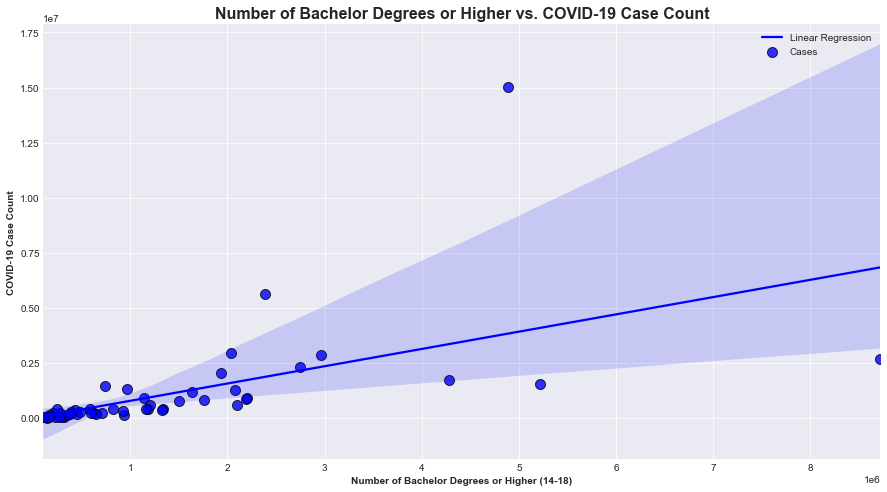

In [42]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Bachelor Degree or Higher 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of Bachelor Degrees or Higher vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of Bachelor Degrees or Higher (14-18)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [43]:
model10 = sm.OLS(LitDF['cases'], LitDF['Bachelor Degree or Higher 14-18']).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.433
Model:                            OLS   Adj. R-squared (uncentered):              0.422
Method:                 Least Squares   F-statistic:                              38.17
Date:                Fri, 29 May 2020   Prob (F-statistic):                    1.16e-07
Time:                        23:44:51   Log-Likelihood:                         -808.50
No. Observations:                  51   AIC:                                      1619.
Df Residuals:                      50   BIC:                                      1621.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Bachelor Degree or Higher 14-18     0.7836      0.127      6.178      0.000       0.529       1.038
==============================================================================
Omnibus:                       81.248   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.150
Skew:                           4.202   Prob(JB):                    5.48e-300
Kurtosis:                      27.040   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

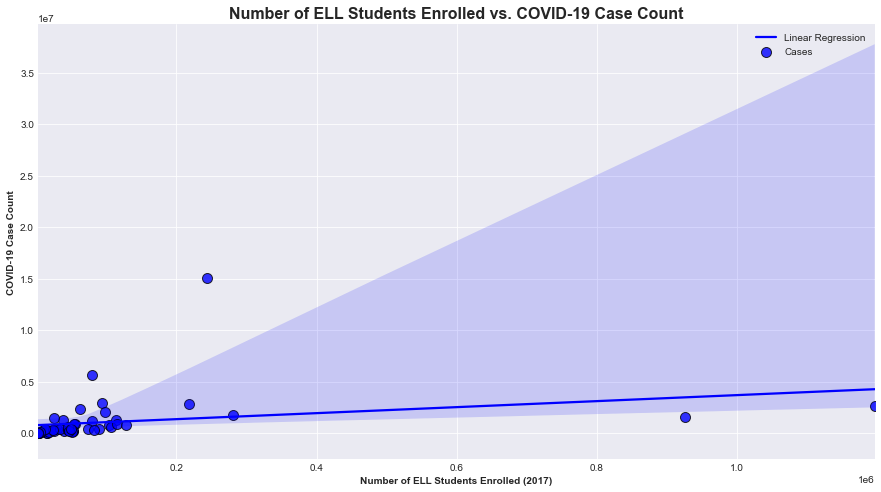

In [44]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'ELL Students Enrolled 2017', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of ELL Students Enrolled vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of ELL Students Enrolled (2017)', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [45]:
model11 = sm.OLS(LitDF['cases'], LitDF['ELL Students Enrolled 2017']).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.162
Model:                            OLS   Adj. R-squared (uncentered):              0.145
Method:                 Least Squares   F-statistic:                              9.681
Date:                Fri, 29 May 2020   Prob (F-statistic):                     0.00307
Time:                        23:44:52   Log-Likelihood:                         -818.45
No. Observations:                  51   AIC:                                      1639.
Df Residuals:                      50   BIC:                                      1641.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
ELL Students Enrolled 2017     4.3713      1.405      3.112      0.003       1.550       7.193
==============================================================================
Omnibus:                       86.987   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1609.238
Skew:                           4.674   Prob(JB):                         0.00
Kurtosis:                      28.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
model12 = sm.OLS(LitDF['cases'], LitDF[['4th 2015 Math', '4th 2015 Science', '8th 2015 Math',
                                       '8th 2015 Science', 'Labor Force w/ Bachelor 2018',
                                       'Total Doctorate Degrees 2018', 'Less Than HS Diploma 14-18',
                                       'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18', 'ELL Students Enrolled 2017']]).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              27.34
Date:                Sat, 30 May 2020   Prob (F-statistic):                    3.51e-15
Time:                        00:11:34   Log-Likelihood:                         -768.34
No. Observations:                  51   AIC:                                      1559.
Df Residuals:                      40   BIC:                                      1580.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
4th 2015 Math                          -1.555e+04   6.75e+04     -0.230      0.819   -1.52e+05    1.21e+05
4th 2015 Science                          1.1e+04   7.23e+04      0.152      0.880   -1.35e+05    1.57e+05
8th 2015 Math                            2.91e+04   5.31e+04      0.548      0.587   -7.82e+04    1.36e+05
8th 2015 Science                       -3.909e+04    6.8e+04     -0.575      0.569   -1.77e+05    9.83e+04
Labor Force w/ Bachelor 2018               0.8703      2.974      0.293      0.771      -5.141       6.882
Total Doctorate Degrees 2018               0.2929      0.057      5.184      0.000       0.179       0.407
Less Than HS Diploma 14-18                -1.7547      1.994     -0.880      0.384      -5.786       2.276
HS Diploma 14-18                           1.3862      0.728      1.903      0.064      -0.086       2.858
Some College or Associate Degree 14-18    -1.9550      1.002     -1.951      0.058      -3.980       0.070
Bachelor Degree or Higher 14-18            1.4630      2.676      0.547      0.588      -3.945       6.871
ELL Students Enrolled 2017               -12.3652      3.720     -3.324      0.002     -19.883      -4.847
==============================================================================
Omnibus:                        5.811   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.766
Skew:                          -0.193   Prob(JB):                       0.0206
Kurtosis:                       4.872   Cond. No.                     8.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#plt.scatter(x = LitDF['4th 2015 Science'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 200)
#plt.scatter(x = LitDF['8th 2015 Math'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 200)
#plt.scatter(x = LitDF['8th 2015 Science'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 200)
#plt.scatter(x = LitDF['Labor Force w/ Bachelor 2018'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k',
            #s = 200)
#plt.scatter(x = LitDF['Total Doctorate Degrees 2018'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k',
            #s = 200)
#plt.scatter(x = LitDF['Less Than HS Diploma 14-18'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k',
            #s = 200)
#plt.scatter(x = LitDF['HS Diploma 14-18'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 200)
#plt.scatter(x = LitDF['Some College or Associate Degree 14-18'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, 
            #edgecolor = 'k', s = 200)
#plt.scatter(x = LitDF['Bachelor Degree or Higher 14-18'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 200)
#plt.scatter(x = LitDF['ELL Students Enrolled 2017'], y = LitDF['cases'], linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 200)

#plt.legend(['4th Math (2015)', '4th Science (2015)', '8th Math (2015)', '8th Science (2015)', 'Labor Force w/ Bachelor (2018)',
           #'Total Doctorate Degrees (2018)', 'Earned Less Than HS Diploma (14-18)', 'Earned HS Diploma (14-18)', 'Some College or Associate Degree (14-18)',
           #'Bachelor Degree or Higher (14-18)', 'ELL Students Enrolled (2017)'])

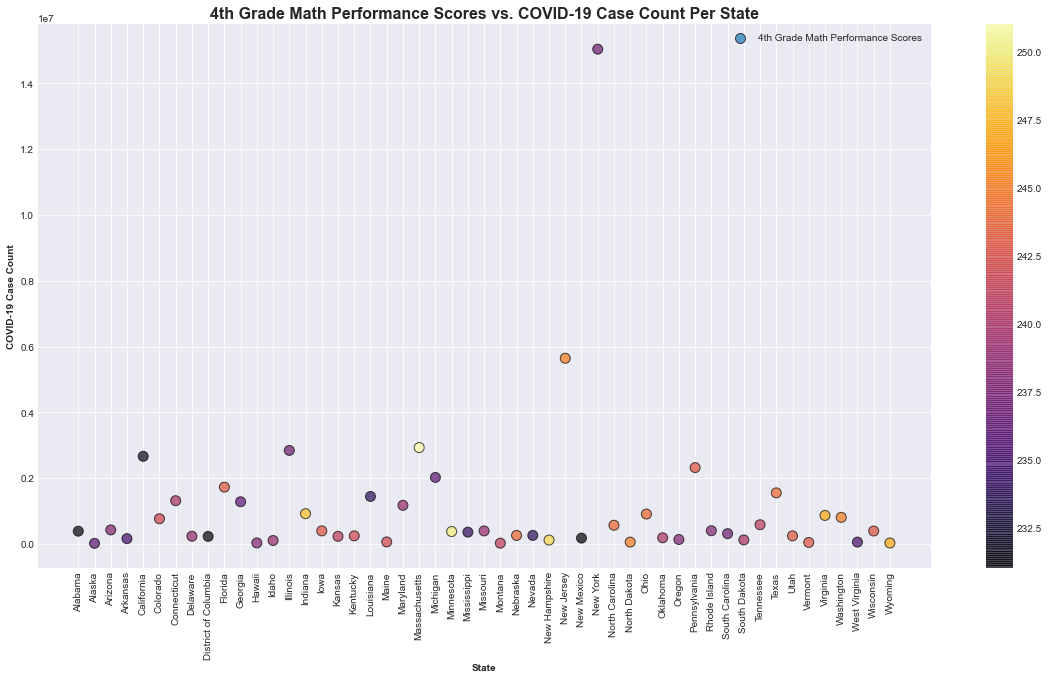

In [55]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['4th 2015 Math'], cmap = 'inferno')
plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['4th Grade Math Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

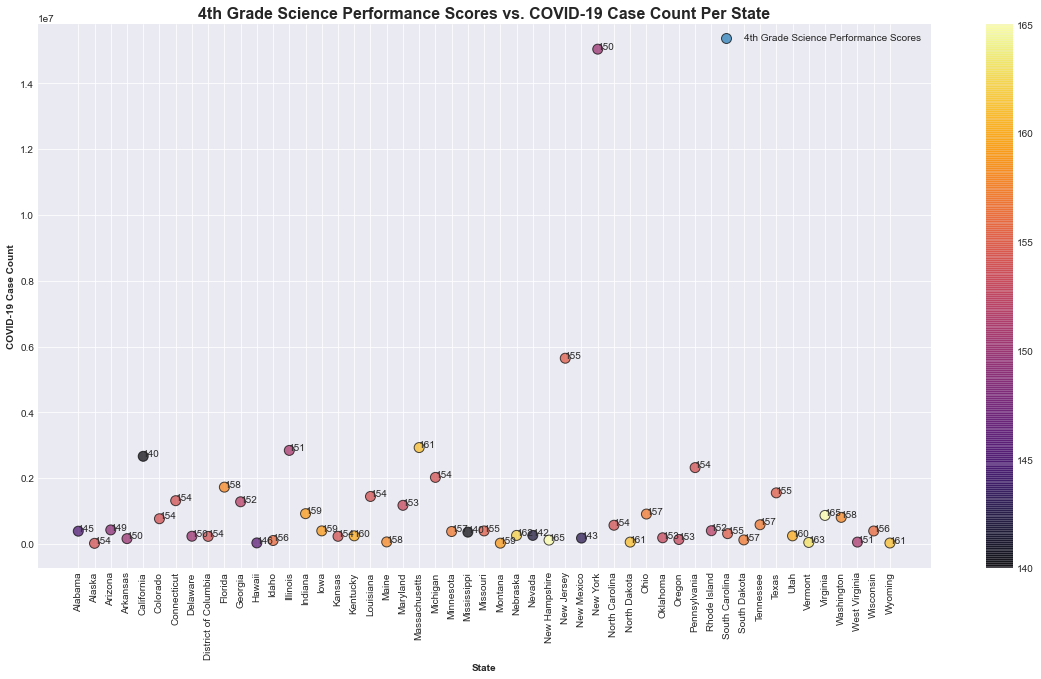

In [56]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['4th 2015 Science'], cmap = 'inferno')
plt.title('4th Grade Science Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['4th Grade Science Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

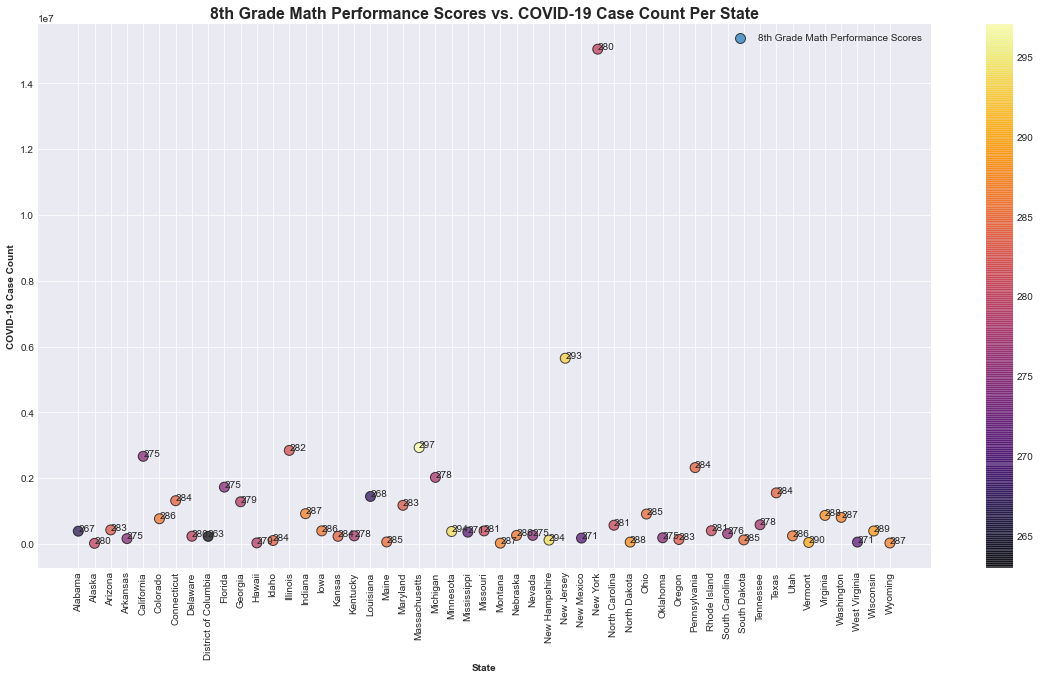

In [57]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['8th 2015 Math'], cmap = 'inferno')
plt.title('8th Grade Math Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['8th Grade Math Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

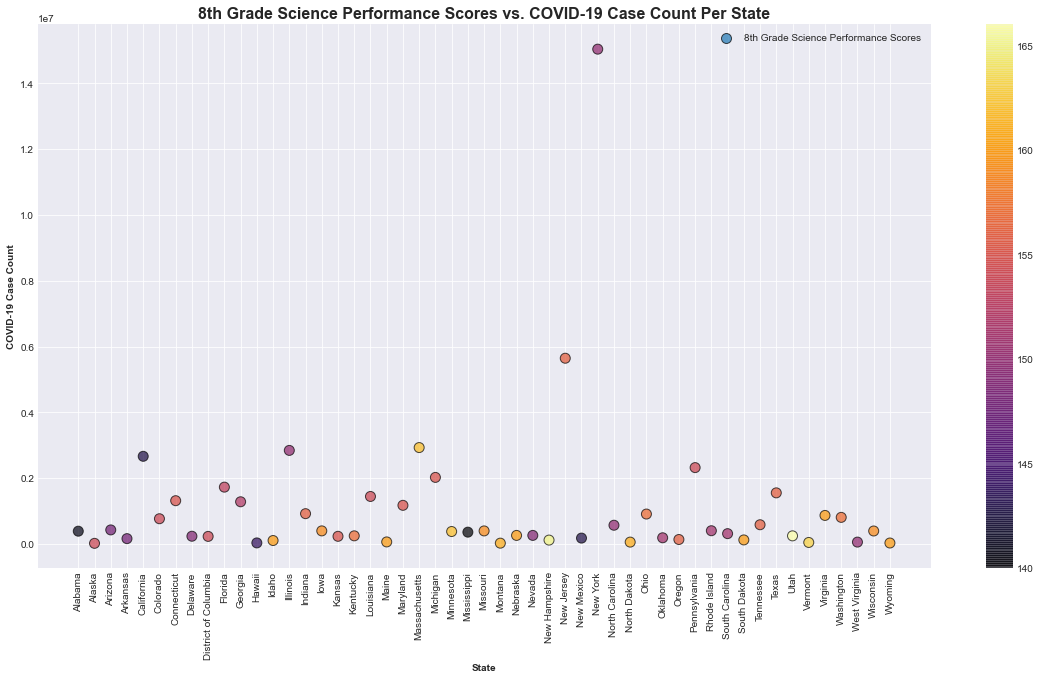

In [61]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['8th 2015 Science'], cmap = 'inferno')
plt.title('8th Grade Science Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['8th Grade Science Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

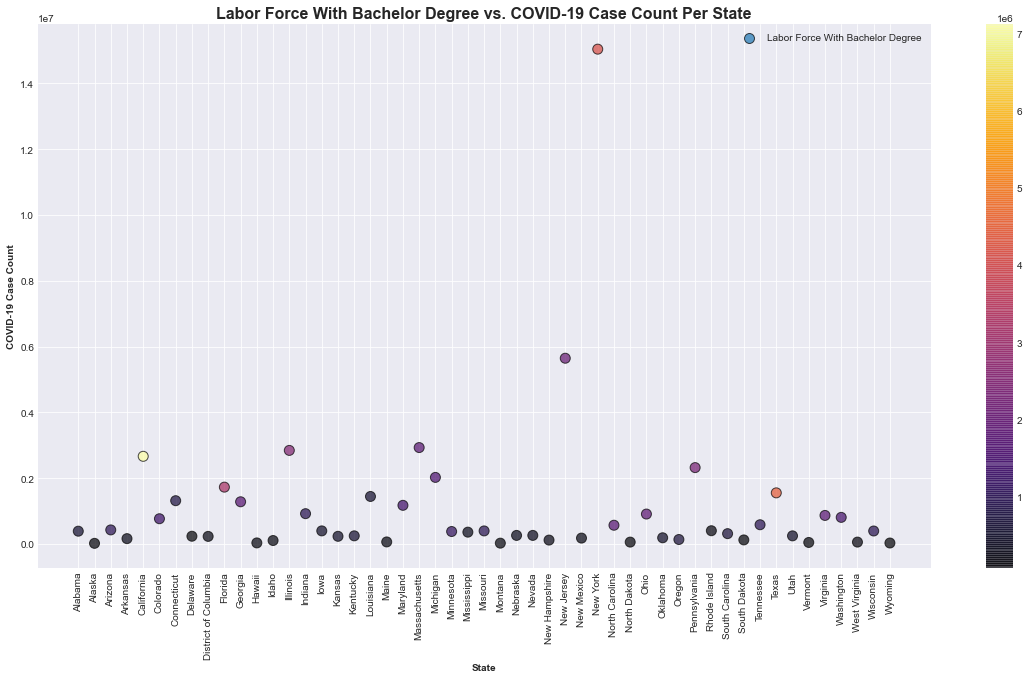

In [60]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Labor Force w/ Bachelor 2018'], cmap = 'inferno')
plt.title('Labor Force With Bachelor Degree vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Labor Force With Bachelor Degree'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

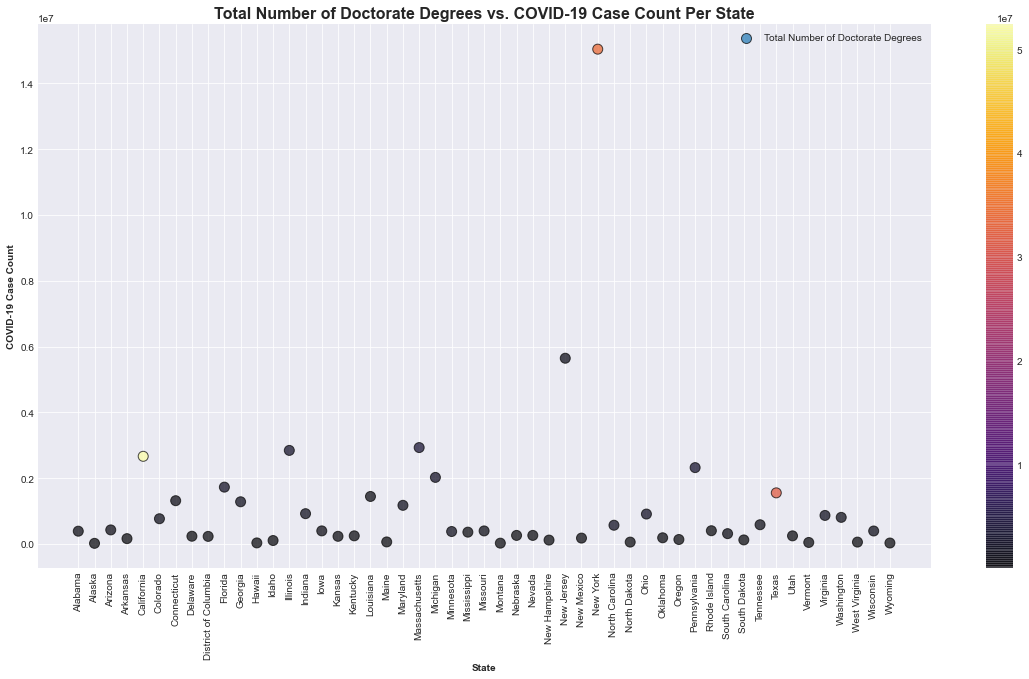

In [62]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Total Doctorate Degrees 2018'], cmap = 'inferno')
plt.title('Total Number of Doctorate Degrees vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Number of Doctorate Degrees'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

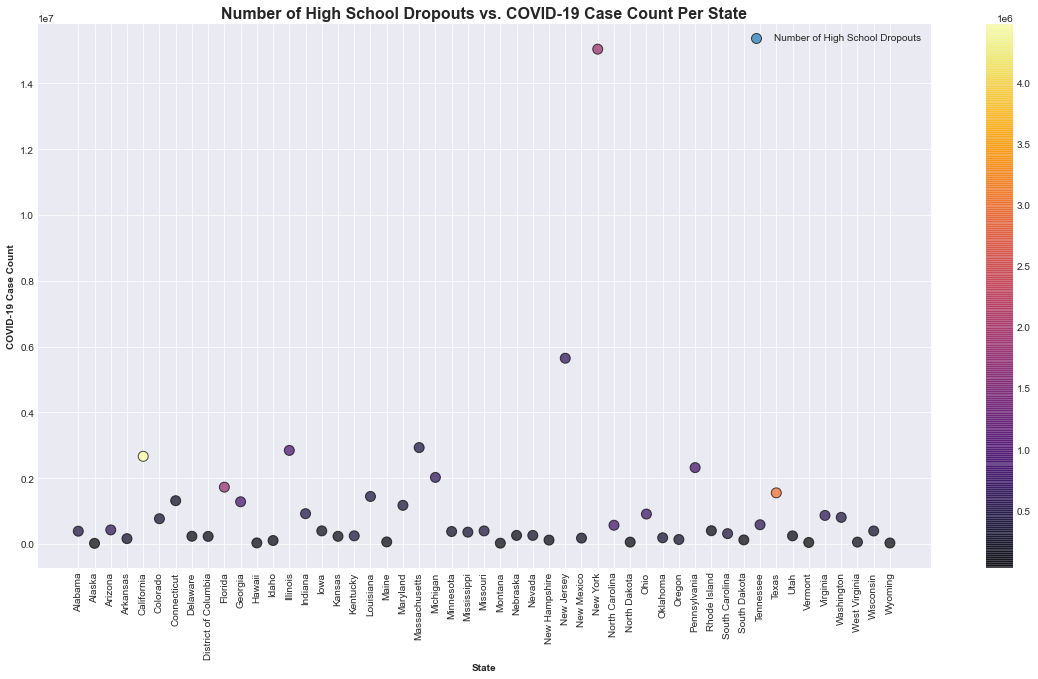

In [63]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Less Than HS Diploma 14-18'], cmap = 'inferno')
plt.title('Number of High School Dropouts vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of High School Dropouts'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

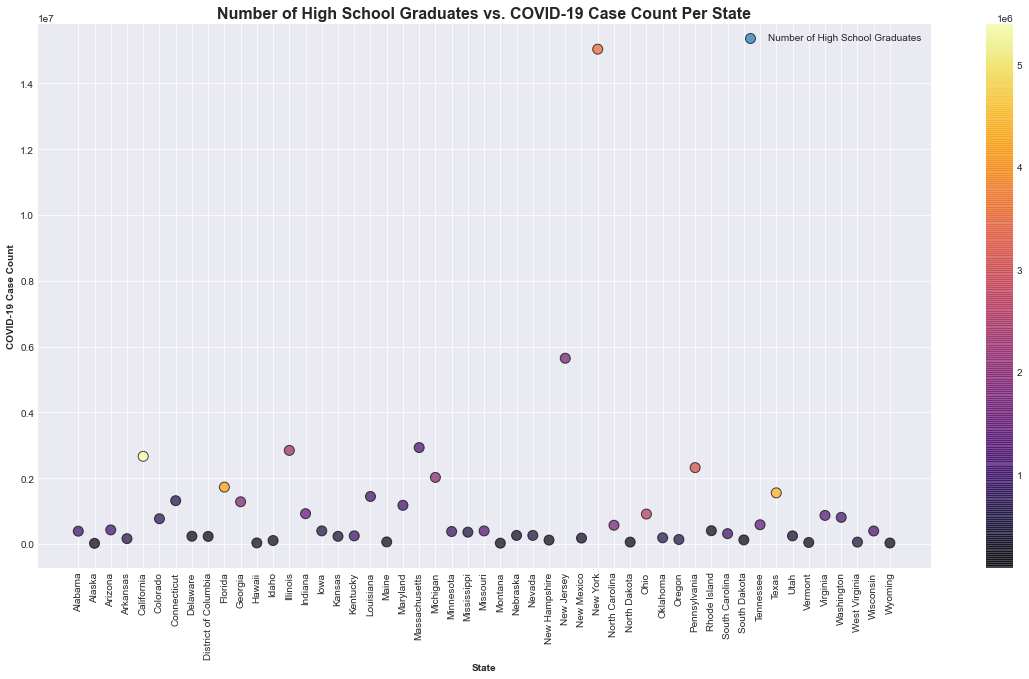

In [64]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['HS Diploma 14-18'], cmap = 'inferno')
plt.title('Number of High School Graduates vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of High School Graduates'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

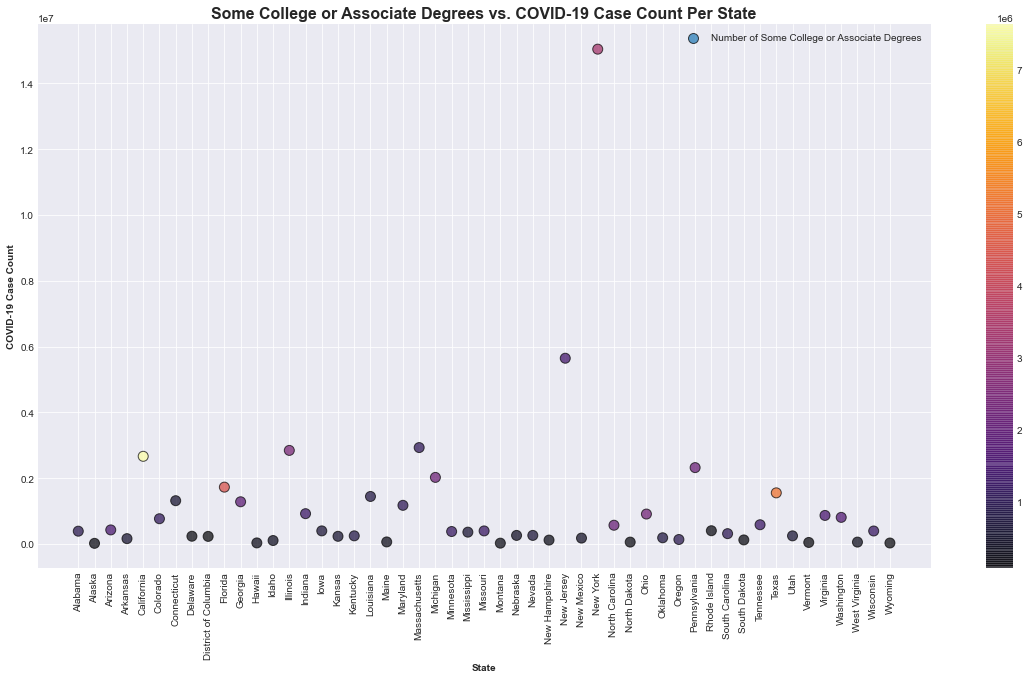

In [65]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Some College or Associate Degree 14-18'], cmap = 'inferno')
plt.title('Some College or Associate Degrees vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of Some College or Associate Degrees'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

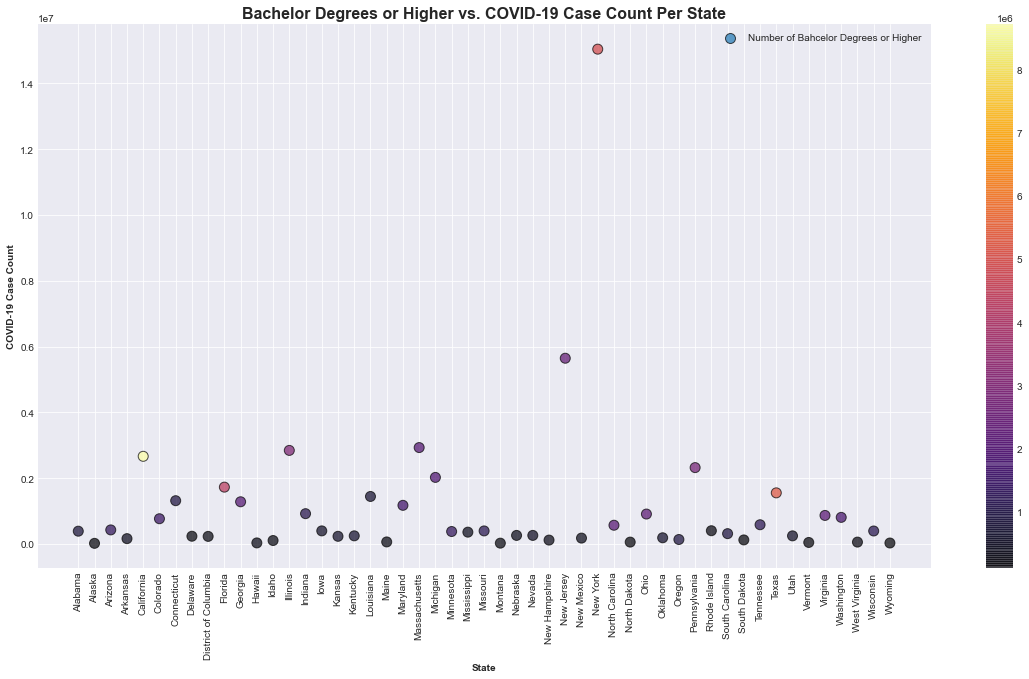

In [66]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Bachelor Degree or Higher 14-18'], cmap = 'inferno')
plt.title('Bachelor Degrees or Higher vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of Bahcelor Degrees or Higher'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

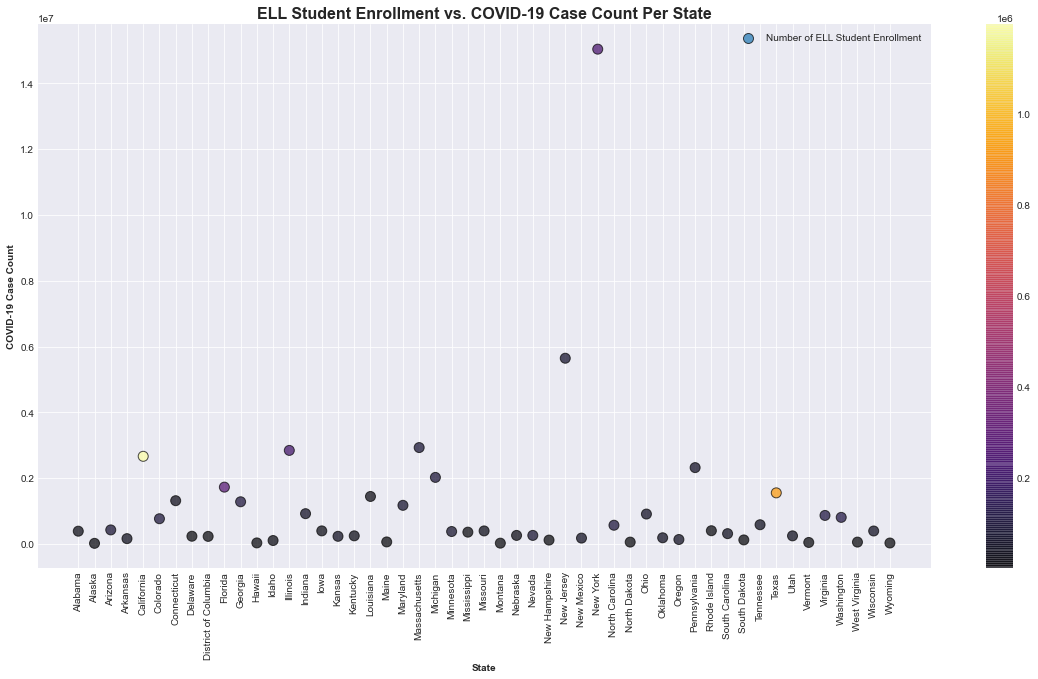

In [67]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['ELL Students Enrolled 2017'], cmap = 'inferno')
plt.title('ELL Student Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of ELL Student Enrollment'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [77]:
X = LitDF[['4th 2015 Math', '4th 2015 Science', '8th 2015 Math',
                                       '8th 2015 Science', 'Labor Force w/ Bachelor 2018',
                                       'Total Doctorate Degrees 2018', 'Less Than HS Diploma 14-18',
                                       'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18', 'ELL Students Enrolled 2017']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 2309162.576651672
MSE Value: 29975473958264.6
RMS Value: 5474986.2062168345
R2 Score: -0.9528587152200361


In [78]:
X = LitDF[['4th 2015 Math', '4th 2015 Science', '8th 2015 Math', '8th 2015 Science']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1941936.168930825
MSE Value: 16235702166043.924
RMS Value: 4029355.0558425505
R2 Score: -0.05773248212257065


In [83]:
X = LitDF[['4th 2015 Math', '4th 2015 Science', '8th 2015 Math', '8th 2015 Science', 'ELL Students Enrolled 2017']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1723888.0811834426
MSE Value: 15171581671197.264
RMS Value: 3895071.459061729
R2 Score: 0.011593426962266506


In [82]:
X = LitDF[['Labor Force w/ Bachelor 2018', 'Total Doctorate Degrees 2018', 'Less Than HS Diploma 14-18',
                                       'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1668985.3997284211
MSE Value: 17665835909252.82
RMS Value: 4203074.57812169
R2 Score: -0.1509036242451034


In [79]:
X = LitDF[['Labor Force w/ Bachelor 2018', 'Total Doctorate Degrees 2018']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1322399.6998384495
MSE Value: 15279363040198.414
RMS Value: 3908882.582042906
R2 Score: 0.00457162687045487


In [80]:
X = LitDF[['Less Than HS Diploma 14-18', 'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1163121.6778552616
MSE Value: 7288941662289.448
RMS Value: 2699804.00442133
R2 Score: 0.5251360071987183


In [81]:
X = LitDF[['ELL Students Enrolled 2017']]

y = LitDF[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

LitModel = LinearRegression()
LitModel.fit(train_X, train_y)

predictions = LitModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1585412.5812178573
MSE Value: 15167019223455.195
RMS Value: 3894485.745699321
R2 Score: 0.011890663824917658
